# Punto 1

In [21]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from scipy import stats

# Utils
separator = '=' * 30
plt.rcParams['text.usetex'] = True

In [2]:
# Dataset
data = pd.read_excel('./datasets/data_exam1.xlsx', sheet_name='data1')
data.head()

,Y,X,Ind
0,66.199147,12.653765,0
1,44.311301,8.204418,0
2,48.390783,8.768596,0
3,58.087413,16.169568,1
4,60.708671,9.980310,0


Ind
0    800
1    200
Name: count, dtype: int64


<Axes: ylabel='Frequency'>

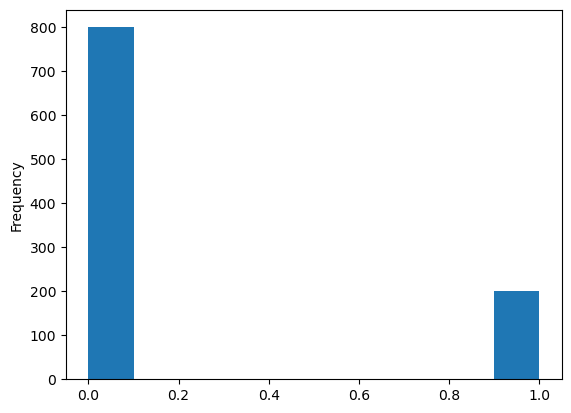

In [3]:
# Categroical data distribution
print(data['Ind'].value_counts())
data['Ind'].plot(kind='hist')

Para la variable categórica Ind:
- 0: 80%
- 1: 20%

In [4]:
# Null values
data.isnull().sum()

Y      0
X      0
Ind    0
dtype: int64

No hay valores nulos

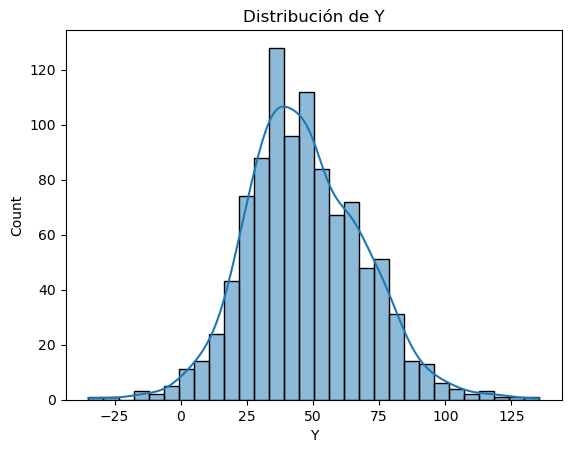

In [5]:
# Y distribution
sns.histplot(data['Y'], kde=True)
plt.title('Distribución de Y')
plt.show()

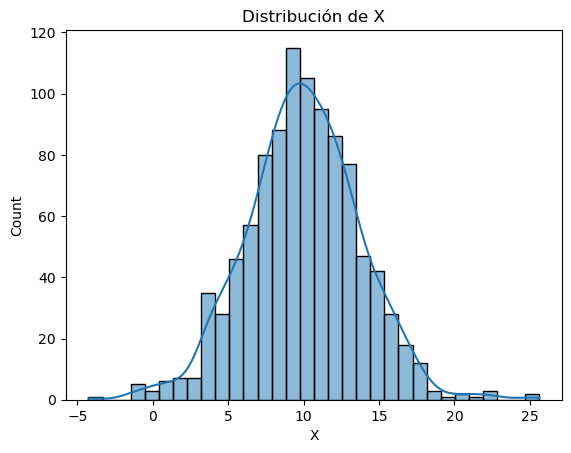

In [6]:
# X distribution
sns.histplot(data['X'], kde=True)
plt.title('Distribución de X')
plt.show()

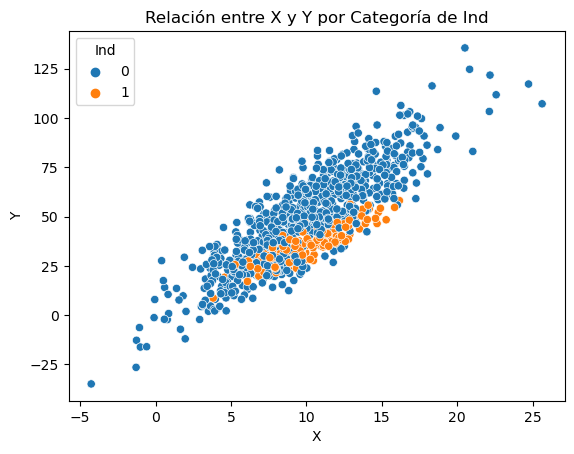

In [7]:
# Relationship between X y Y
sns.scatterplot(data=data, x='X', y='Y', hue='Ind')
plt.title('Relación entre X y Y por Categoría de Ind')
plt.show()

- X y Y siguen una tendencia lineal positiva
- La relación de X y Y por categoría de Ind (0 y 1) es similar, sigue siendo positiva 
- Aunque hay una superposición, parece haber una distinción en la ubicación de los puntos azules y naranjas (una agrupación). Esto puede sugerir que la variable 'Ind' tiene un efecto en la relación entre X y Y.

In [8]:
# Pearsons correlation
print('Pearson')
print(data[['X', 'Y', 'Ind']].corr(), '\n', separator)

# Spearman correlation
print('Spearmans')
print(data[['X', 'Y', 'Ind']].corr(method='spearman'), '\n', separator)

# Kendall correlation
print('Kenall')
print(data[['X', 'Y', 'Ind']].corr(method='kendall'), '\n', separator)


Pearson
            X         Y       Ind
X    1.000000  0.832057  0.024069
Y    0.832057  1.000000 -0.237224
Ind  0.024069 -0.237224  1.000000 
Spearmans
            X         Y       Ind
X    1.000000  0.803893  0.028111
Y    0.803893  1.000000 -0.275985
Ind  0.028111 -0.275985  1.000000 
Kenall
            X         Y       Ind
X    1.000000  0.610515  0.022964
Y    0.610515  1.000000 -0.225454
Ind  0.022964 -0.225454  1.000000 


- Existe una correlación positiva fuerte entre X y Y

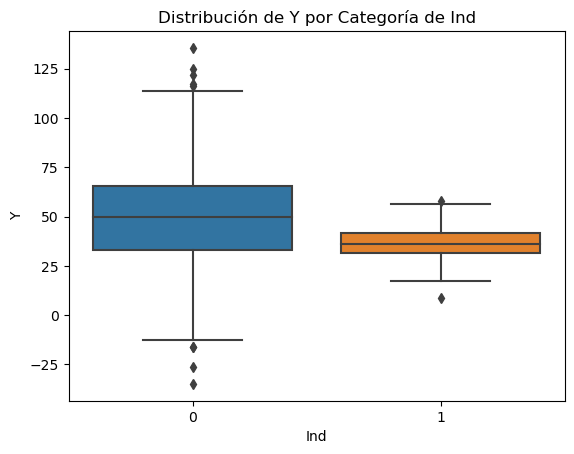

In [9]:
sns.boxplot(data=data, x='Ind', y='Y')
plt.title('Distribución de Y por Categoría de Ind')
plt.show()

### Distribución de los valores de la variable Y para cada una de las categorías de la variable categórica Ind (0 y 1)
- La mediana de la categoría 0 parece ser más alta que la de la categoría 1, lo que sugiere que los valores de Y tienden a ser más altos cuando Ind es 0.
- La categoría 0 tiene un IQR más amplio que la categoría 1, lo que indica una mayor variabilidad en los valores de Y cuando Ind es 0.
- Ambas categorías presentan valores atípicos, lo que indica la presencia de algunos valores de Y que son inusualmente altos o bajos en comparación con el resto de los datos.
- La categoría 0 tiene un rango de datos más amplio en comparación con la categoría 1, sugiriendo que los valores de Y para Ind = 0 varían más que para Ind = 1.

In [10]:
# Describe X and Y for Ind = 0
description_ind_0 = data[data['Ind'] == 0][['X', 'Y']].describe()
print("Description for Ind = 0:")
print(description_ind_0)

print(separator)
# Describe X and Y for Ind = 1
description_ind_1 = data[data['Ind'] == 1][['X', 'Y']].describe()
print("Description for Ind = 1:")
print(description_ind_1)


Description for Ind = 0:
                X           Y
count  800.000000  800.000000
mean     9.931600   49.567376
std      4.055795   23.594228
min     -4.263757  -34.894319
25%      7.281930   32.993351
50%      9.873947   49.562809
75%     12.661513   65.509785
max     25.628678  135.542574
Description for Ind = 1:
                X           Y
count  200.000000  200.000000
mean    10.157892   36.499253
std      2.232061    8.214723
min      3.821281    8.663725
25%      8.865269   31.619189
50%     10.118529   36.079339
75%     11.654149   41.560675
max     16.169568   58.087413


### Justificación:
Según la información presentada en el análisis exploratorio sugiere que un modelo de regresión lineal podría ser adecuado para modelar la relación entre X y Y.
Basado en la correlación significativa entre X y Y, y asumiendo que la variable Ind también podría influir en Y, sí consideramos posible generar un modelo de regresión lineal para Y incluyendo a Ind como una variable categórica sin interacción. Esto es posible dado a la fuerte correlación entre X e Y,lo que sugiere una influencia significativa de X en Y.La inclusión de Ind permite evaluar los cambios en el nivel base de Y entre diferentes categorías. Este enfoque mantiene la simplicidad del modelo y la claridad en la interpretación, explorando posibles diferencias entre categorías en una etapa preliminar.

## Modelo de regresión lineal

In [12]:
model = smf.ols('Y ~ X + C(Ind)', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1566.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          2.25e-308
Time:                        16:19:07   Log-Likelihood:                -3801.1
No. Observations:                1000   AIC:                             7608.
Df Residuals:                     997   BIC:                             7623.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7873      0.984      0.800      

## Análisis de Resultados del Modelo de Regresión Lineal

### Estadísticas del Modelo

- **R-cuadrado (R²)**: 0.759
  - Indica que el 75.9% de la variabilidad de `Y` puede ser explicada por las variables `X` e `Ind`.
- **R-cuadrado ajustado**: 0.758
  - Muestra que el modelo ajusta bien sin ser penalizado significativamente por incluir variables adicionales.
- **F-estadístico**: 1566
  - Sugiere que hay una relación lineal significativa, con un valor-P cercano a 0.

### Coeficientes del Modelo

- **Intercepto**: 0.7873 (p-valor: 0.424)
  - No estadísticamente significativo, indicando que el valor esperado de `Y` cuando `X` es 0 y `Ind` es 0, es cercano a 0.7873.
- **C(Ind)[T.1]**: -14.1796 (p-valor: prácticamente 0)
  - Significativo, sugiriendo que `Y` disminuye en promedio 14.1796 unidades cuando `Ind` cambia de 0 a 1, manteniendo `X` constante.
- **X**: 4.9116 (p-valor: prácticamente 0)
  - Muy significativo, indicando que por cada unidad que incrementa `X`, `Y` aumenta en 4.9116 unidades.

### Diagnóstico del Modelo

- **Durbin-Watson**: 1.997
  - Implica que no hay evidencia de autocorrelación en los residuos del modelo.
- **Pruebas de Normalidad**:
  - **Omnibus**: 2.517 (p-valor: 0.284)
  - **Jarque-Bera (JB)**: 2.440 (p-valor: 0.295)
  - Ambas pruebas indican que no hay desviaciones significativas de la normalidad en los residuos.

# Visualización del modelo en el diagrama de disperción

### Ind = 0
$$ Y_i = \beta_{\text{Intercept}} + \beta_{X}X_i $$
### Ind = 1
$$ Y_i = \beta_{\text{Intercept}} + \beta_{\text{C(Ind)[T.1]}} + \beta_{X}X_i $$

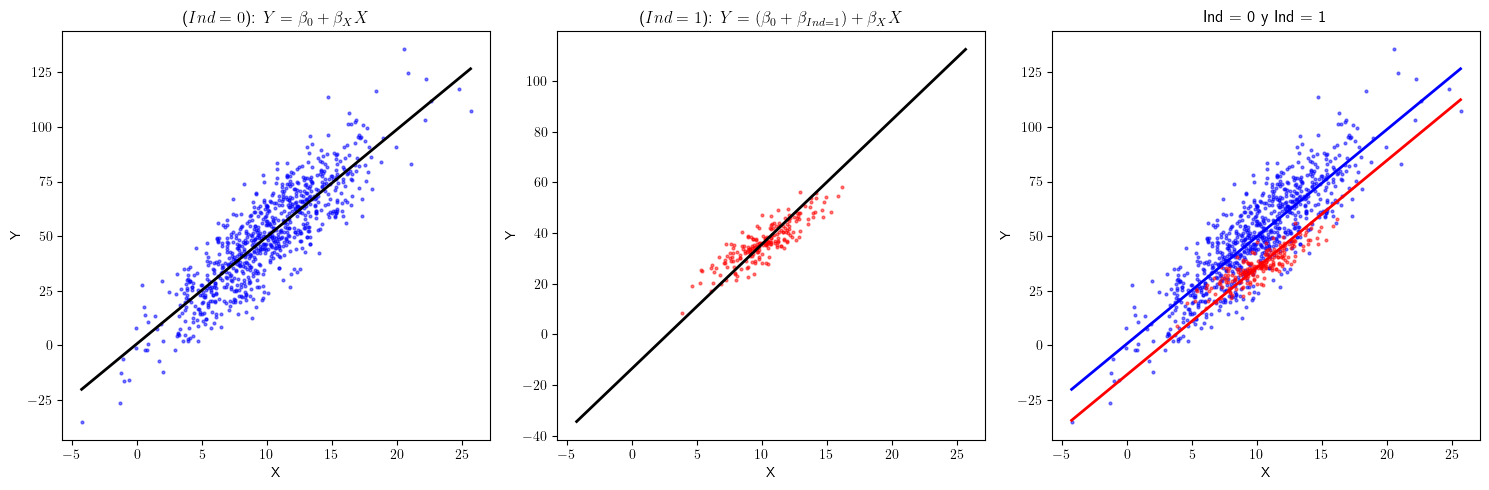

In [31]:
# Create a sequence of X values ​​for predictionsCreate a sequence of X values ​​for predictions
x_vals = np.linspace(data['X'].min(), data['X'].max(), 100)

# Predict Y for Ind=0 and Ind=1 using the fitted model
# model.params['X'] --> Line slope

# Creating the prediction lines
# Y = b0 + (b1 * X)
pred_Y_ind_0 = model.params['Intercept'] + model.params['X'] * x_vals
# Y = b0 + (b1 * X) + (change associated with Ind=1)
pred_Y_ind_1 = (model.params['Intercept'] + model.params['C(Ind)[T.1]'] + model.params['X'] * x_vals)


# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

title_no_interaction_ind0 = r"($Ind = 0$): $Y = \beta_{0} + \beta_{X}X$"
title_no_interaction_ind1 = r"($Ind = 1$): $Y = (\beta_{0} + \beta_{Ind=1}) + \beta_{X}X$"

# Plot 1: Scatter plot of data with Ind = 0
axes[0].scatter(data[data['Ind'] == 0]['X'], data[data['Ind'] == 0]['Y'], color='blue', label='Ind = 0', alpha=0.5, s=4)
axes[0].plot(x_vals, pred_Y_ind_0, color='black', linewidth=2, label='Regresión Ind = 0')
axes[0].set_title(title_no_interaction_ind0)
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')

# Plot 2: Scatter plot of data with Ind = 1
axes[1].scatter(data[data['Ind'] == 1]['X'], data[data['Ind'] == 1]['Y'], color='red', label='Ind = 1', alpha=0.5, s=4)
axes[1].plot(x_vals, pred_Y_ind_1, color='black', linewidth=2, label='Regresión Ind = 1')
axes[1].set_title(title_no_interaction_ind1)
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')

# Plot 3: Regression lines for Ind = 0 and Ind = 1
axes[2].scatter(data[data['Ind'] == 0]['X'], data[data['Ind'] == 0]['Y'], color='blue', label='Ind = 0', alpha=0.5, s=4)
axes[2].scatter(data[data['Ind'] == 1]['X'], data[data['Ind'] == 1]['Y'], color='red', label='Ind = 1', alpha=0.5, s=4)
axes[2].plot(x_vals, pred_Y_ind_0, color='blue', linewidth=2, label='Regresión Ind = 0')
axes[2].plot(x_vals, pred_Y_ind_1, color='red', linewidth=2, label='Regresión Ind = 1')
axes[2].set_title('Ind = 0 y Ind = 1')
axes[2].set_xlabel('X')
axes[2].set_ylabel('Y')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


### Análisis gráfico
Realizando un análisis a lo presentado por las gráficas anteriores, encontramos que la pendiente parece no describir adecuadamente el comportamiento de los datos. Por lo que realizaremos a continuación una prueba de interacción, es decir, que asumiremos que si hay interacción entre las variables X e Ind. Esto nos permitirá observar si la pendiente de X cambia cuando Ind es 1.

##  Prueba de interacción


In [14]:
model_with_interaction = smf.ols('Y ~ X * C(Ind)', data=data).fit()
print(model_with_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     1081.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          1.34e-312
Time:                        16:19:08   Log-Likelihood:                -3787.5
No. Observations:                1000   AIC:                             7583.
Df Residuals:                     996   BIC:                             7603.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.4991      1.001     -0.498

El término de interacción en el modelo es negativo (-1.8466) y es estadísticamente significativo, esto sugiere que la pendiente de la recta de regresión para X cuando Ind = 1 es menor en 1.8466 unidades que la pendiente de la recta de regresión para X cuando Ind = 0.

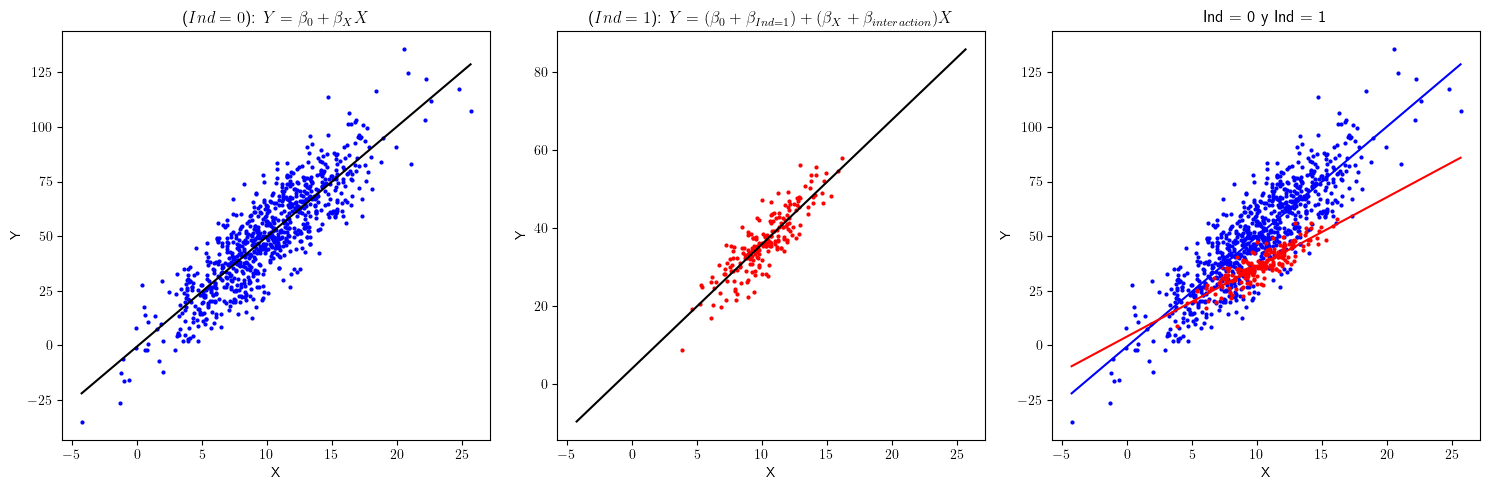

In [58]:
intercept = model_with_interaction.params['Intercept']
slope_X = model_with_interaction.params['X']
interaction = model_with_interaction.params['X:C(Ind)[T.1]']

x_vals = np.linspace(data['X'].min(), data['X'].max(), 100)

y_pred_0 = intercept + slope_X * x_vals
y_pred_1 = intercept + model_with_interaction.params['C(Ind)[T.1]'] + (slope_X + interaction) * x_vals

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

title_interaction_ind0 = r"($Ind = 0$): $Y = \beta_{0} + \beta_{X}X$"
title_interaction_ind1 = r"($Ind = 1$): $Y = (\beta_{0} + \beta_{Ind=1}) + (\beta_{X} + \beta_{interaction})X$"

axes[0].scatter(data[data['Ind'] == 0]['X'], data[data['Ind'] == 0]['Y'], color='blue', label='Ind = 0', s=4)
axes[0].plot(x_vals, y_pred_0, color='black', label='Regresión Ind = 0')
axes[0].set_title(title_interaction_ind0)
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')

axes[1].scatter(data[data['Ind'] == 1]['X'], data[data['Ind'] == 1]['Y'], color='red', label='Ind = 1', s=4)
axes[1].plot(x_vals, y_pred_1, color='black', label='Regresión Ind = 1')
axes[1].set_title(title_interaction_ind1)
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')

axes[2].scatter(data[data['Ind'] == 0]['X'], data[data['Ind'] == 0]['Y'], color='blue', label='Ind = 0', s=4)
axes[2].scatter(data[data['Ind'] == 1]['X'], data[data['Ind'] == 1]['Y'], color='red', label='Ind = 1', s=4)
axes[2].plot(x_vals, y_pred_0, color='blue', label='Regresión Ind = 0')
axes[2].plot(x_vals, y_pred_1, color='red', label='Regresión Ind = 1')
axes[2].set_title("Ind = 0 y Ind = 1")
axes[2].set_xlabel('X')
axes[2].set_ylabel('Y')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Y')

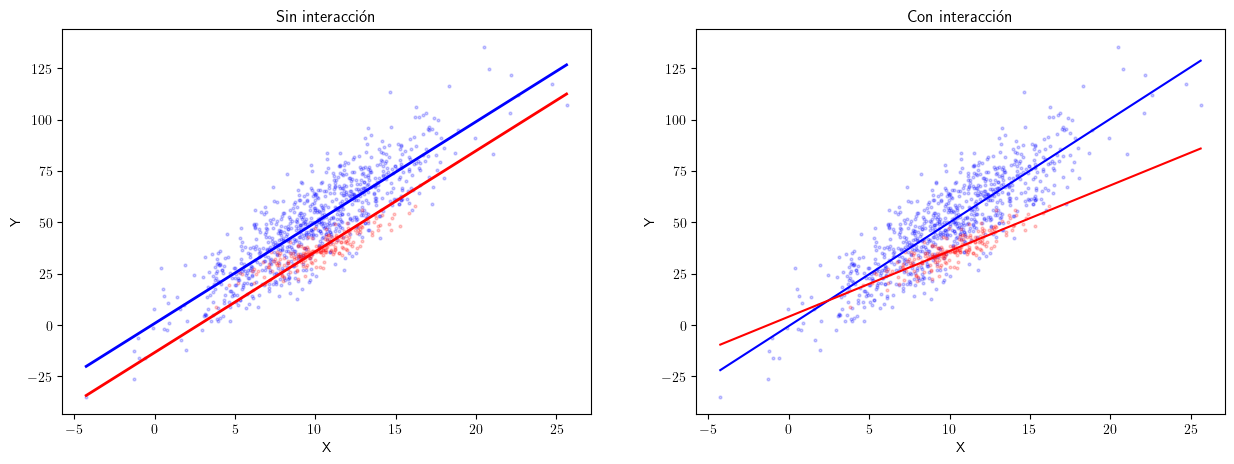

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].scatter(data[data['Ind'] == 0]['X'], data[data['Ind'] == 0]['Y'], color='blue', label='Ind = 0', alpha=0.2, s=4)
axes[0].scatter(data[data['Ind'] == 1]['X'], data[data['Ind'] == 1]['Y'], color='red', label='Ind = 1', alpha=0.2, s=4)
axes[0].plot(x_vals, pred_Y_ind_0, color='blue', linewidth=2, label='Regresión Ind = 0')
axes[0].plot(x_vals, pred_Y_ind_1, color='red', linewidth=2, label='Regresión Ind = 1')
axes[0].set_title('Sin interacción')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')

axes[1].scatter(data[data['Ind'] == 0]['X'], data[data['Ind'] == 0]['Y'], color='blue', label='Ind = 0', s=4, alpha=0.2)
axes[1].scatter(data[data['Ind'] == 1]['X'], data[data['Ind'] == 1]['Y'], color='red', label='Ind = 1', s=4, alpha=0.2)
axes[1].plot(x_vals, y_pred_0, color='blue', label='Regresión Ind = 0')
axes[1].plot(x_vals, y_pred_1, color='red', label='Regresión Ind = 1')
axes[1].set_title('Con interacción')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')

Los gráficos y el análisis del modelo indica que las interacciones son significativas. Al implementar el modelo con interaccieon,se observa que no solo se alinea mejor con los datos observados, sino que también proporciona un marco más completo y realista para entender y predecir la variable dependiente Y.

Linealidad y Homoscedasticidad ==============================


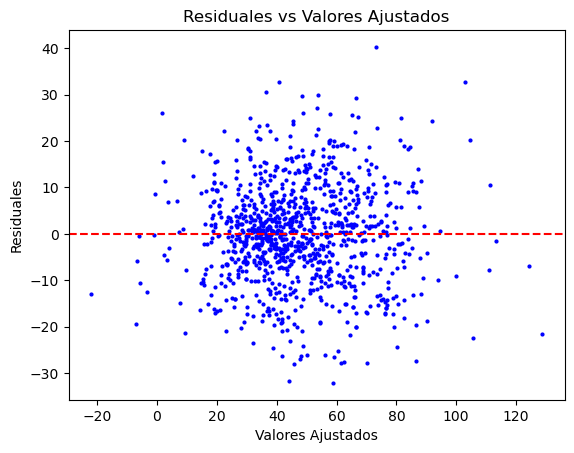

Independencia ==============================
Estadístico de Durbin-Watson: 1.9848054259274441
Normalidad ==============================


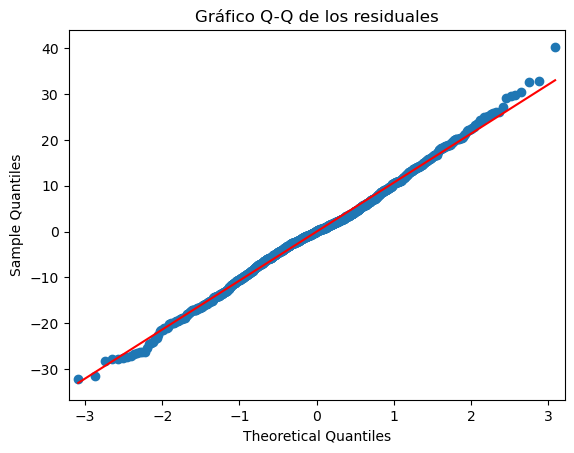

ShapiroResult(statistic=0.9961398243904114, pvalue=0.013781944289803505)
Multicolinealidad ==============================
VIFs: [8.754810845175124, 18.852602858861175, 1.0760572580613532, 18.983379216762742]


In [16]:
residuals = model_with_interaction.resid
fitted = model_with_interaction.fittedvalues

print('Linealidad y Homoscedasticidad', separator)
plt.scatter(fitted, residuals, s=4, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuales')
plt.title('Residuales vs Valores Ajustados')
plt.show()

print('Independencia', separator)
# Durbin-Watson
dw = durbin_watson(residuals)
print('Estadístico de Durbin-Watson:', dw)

print('Normalidad', separator)
# Gráfico Q-Q de los residuales
sm.qqplot(residuals, line='s')
plt.title('Gráfico Q-Q de los residuales')
plt.show()

# Prueba Shapiro-Wilk de normalidad
print(stats.shapiro(residuals))

print('Multicolinealidad', separator)
# Calculando el VIF para cada variable independiente
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = model_with_interaction.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
print('VIFs:', vif)
